## Importing the necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import theano
from PIL import Image
import cv2

from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.


In [2]:
path1 = 'D:\Projects\Internshala\input_data' # original input data directory
path2 = 'D:\Projects\Internshala\input_data_resized' # after image processing directory

In [3]:
listing = os.listdir(path1)
len(listing) # 2007 total input images

2007

## Image Processing

In [4]:
dim = (200, 200)

In [5]:
for file in listing:
    im = cv2.imread(path1 + '\\' + file)
    im1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(im1, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(path2 + '\\' + file, img)

In [6]:
imlist = os.listdir(path2)

In [7]:
print(len(imlist))

2007


 ## Converting the images into an array

In [8]:
from numpy import *
im1 = array(Image.open('input_data_resized'+'\\'+imlist[0]))

In [9]:
m,n = im1.shape[0:2]
print(m,n)

200 200


In [10]:
im1.shape

(200, 200)

In [11]:
immatrix = array([array(Image.open('input_data_resized'+'\\'+im2)).flatten()
                 for im2 in imlist],'f')

In [12]:
immatrix

array([[ 32.,  32.,  32., ..., 142., 142., 142.],
       [112., 112., 112., ..., 102., 103., 104.],
       [ 81.,  80.,  79., ..., 121., 117., 123.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ...,  45.,  44.,  43.],
       [255., 255., 255., ..., 251., 250., 255.]], dtype=float32)

In [13]:
immatrix.shape # 2007 images of pixels value 200x200x3

(2007, 40000)

## Creating the labels

In [14]:
labels = np.ones((len(imlist),),dtype=int)

In [15]:
print(len(labels))

2007


In [16]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
labels[0:154] = 0 
labels[154:310] = 1 
labels[310:465] = 2 
labels[465:620] = 3
labels[620:775] = 4
labels[775:930] = 5
labels[930:1085] = 6
labels[1085:1240] = 7
labels[1240:1395] = 8
labels[1395:1550] = 9
labels[1550:1705] = 10
labels[1705:1859] = 11
labels[1859:2007] = 12

## Shuffling the Input Data

In [18]:
data , label = shuffle(immatrix, labels, random_state = 10)
train_data = [data,label]

In [19]:
train_data

[array([[103., 102., 100., ..., 171., 171., 171.],
        [220., 220., 221., ..., 230., 230., 229.],
        [253., 253., 253., ..., 247., 247., 247.],
        ...,
        [219., 219., 219., ..., 216., 217., 218.],
        [250., 248., 247., ..., 211., 205., 208.],
        [245., 245., 245., ..., 239., 239., 240.]], dtype=float32),
 array([11,  0,  5, ...,  3,  7,  8])]

In [20]:
train_data[0].shape

(2007, 40000)

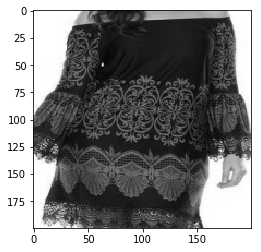

In [21]:
plt.imshow(immatrix[400].reshape(200,200),cmap='gray')
plt.show()

## Preparing the Data for training and testing

In [22]:
(X, y) = (train_data[0],train_data[1])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1605, 40000)
(402, 40000)
(1605,)
(402,)


In [25]:
X_train = X_train.reshape(X_train.shape[0],1,200,200)
X_test = X_test.reshape(X_test.shape[0],1,200,200)
input_shape=(1,200,200)

In [26]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0], "Training Samples")
print(X_test.shape[0], "Testing Samples")

(1605, 1, 200, 200)
(402, 1, 200, 200)
1605 Training Samples
402 Testing Samples


In [27]:
# Number of output classes
nb_classes = 13
# For printing all the rows and columns of any array
np.set_printoptions(threshold=np.inf)

In [28]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [29]:
Y_train

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 

In [30]:
Y_test

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 

## Defining all the parameters of our CNN Model

In [31]:
# Batch Size to train
batch_size = 32
# Number of epochs to train
nb_epoch = 10
# As it is GrayScale image therefore,
img_channels = 1
# Number of Convolution filters to use
nb_filters = 32
# Size of pooling area for MaxPooling2D
nb_pool = 2
# Size of kernel
nb_conv = 3

## Verifying Image and Label

In [32]:
X_train.shape

(1605, 1, 200, 200)

In [33]:
X_train[0].shape

(1, 200, 200)

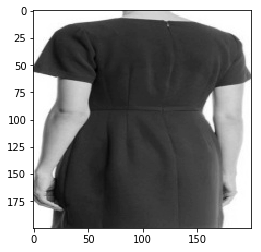

Label :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [34]:
plt.imshow(X_train[100,0], interpolation='nearest',cmap='gray')
plt.show()
print("Label : ", Y_train[100,:])

## CNN Model

In [35]:
model = Sequential()

model.add(Conv2D(nb_filters,(nb_conv,nb_conv),
                activation='relu',
                input_shape=input_shape,
                data_format='channels_first'))
model.add(Conv2D(nb_filters,(nb_conv,nb_conv),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 198, 198)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 196, 32)       57056     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 98, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 98, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 47040)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6021248   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Compilation and Fitting input in the model

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train,
                    batch_size=batch_size,
                    verbose=2,
                    epochs=nb_epoch,
                    validation_data=(X_test,Y_test))

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])\n",
print('Test accuracy:', score[1])

## Predicting the output

In [ ]:
print(model.predict_classes(X_test[1:5]))
print(Y_test[1:5])

## Use of theano to visualise the intermediate layers

In [ ]:
output_layer = model.layers[0].get_output()
output_fn = theano.function([model.layers[0].get_input()],output_layer)

input_image = X_train[0:1,:,:,:]
print(input_image.shape)

plt.imshow(input_image[0,0,:,:],cmap='gray')
plt.imshow(input_image[0,0,:,:])

output_image = output_fn(input_image)
print(output_image.shape)

output_image = np.rollaxis(np.rollaxis(output_image,3,1),3,1)
print(output_image.shape)


fig = plt.figure(figsize=(8,8))
for i in range(32):
    ax = fig.add_subplot(6,6,i=1)
    ax.imshow(output_image[0,:,:,i],cmap=matplotlib.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt